In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
from ipywidgets import interact_manual, interact, widgets, FloatSlider

def repr(var, time, n):
    mRNA = var[:3]
    prot = var[3:]
    dmRNA0 = - mRNA[0] + alpha/(1 + prot[2]**n) + alpha0
    dmRNA1 = - mRNA[1] + alpha/(1 + prot[0]**n) + alpha0
    dmRNA2 = - mRNA[2] + alpha/(1 + prot[1]**n) + alpha0
    dprot0 = - beta*(prot[0] - mRNA[0])
    dprot1 = - beta*(prot[1] - mRNA[1])
    dprot2 = - beta*(prot[2] - mRNA[2])
    return [dmRNA0, dmRNA1, dmRNA2, dprot0, dprot1, dprot2]
  
def func(n):
    time = np.linspace(0, 100, 5000)
    mRNAInit = np.array([10.0, 1.0, 1.0])
    mprotInit = np.array([1.0, 1.0, 1.0])
    var = np.concatenate((mRNAInit, mprotInit), axis=None)
    result = odeint(repr, var, time, args=(n,))
    
    plt.style.use('seaborn-white')
    plt.subplots(figsize=(18, 5))
    plt.subplot(1, 2, 1)
    plt.plot(time, result[:,0], time, result[:,1], time, result[:,2])
    plt.xlabel('time')
    plt.ylabel('result')
    plt.title('mRNA plot')
    plt.subplot(1, 2, 2)
    plt.plot(time, result[:,3], time, result[:,4], time, result[:,5])
    plt.xlabel('time')
    plt.ylabel('result')
    plt.title('protein plot')
    #plt.savefig("mrna-prot.png",dpi=300)
    plt.show()

    plt.subplots(figsize=(18, 5))
    plt.plot(time[0:2000], result[:,0][0:2000], time[0:2000], result[:,3][0:2000])
    plt.xlabel('time')
    plt.ylabel('result')
    plt.title('delay plot')
    #plt.savefig("delay.png",dpi=300)

    plt.show()

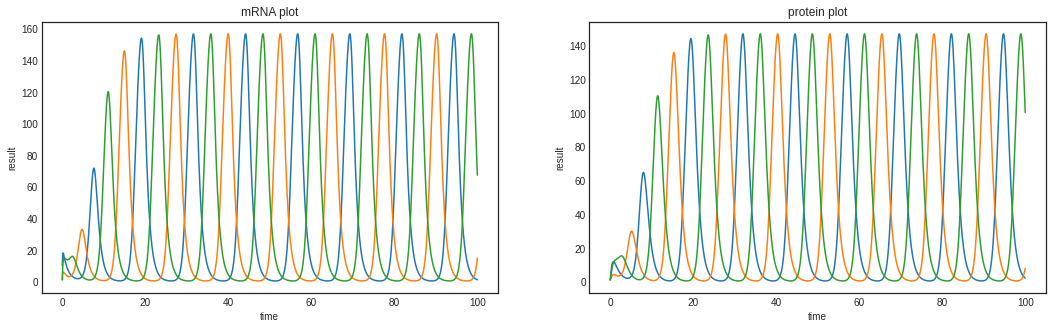

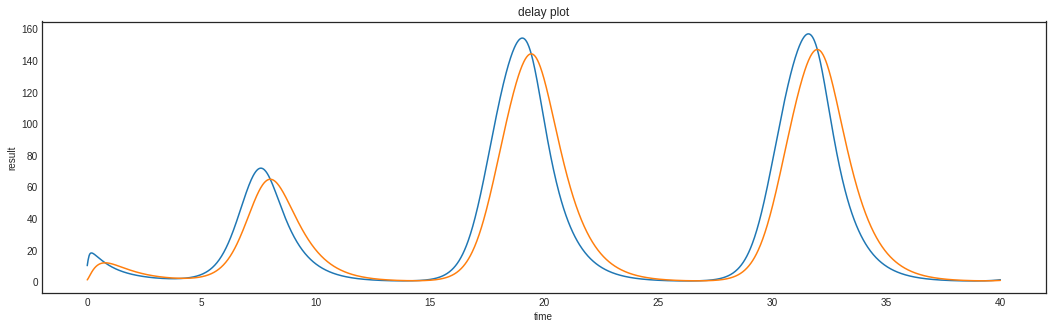

In [2]:
#@title Parametri del Modello { run: "auto" }
alpha =  220 #@param {type:"number"}
alpha0 = 0.0005 #@param {type:"number"}
beta =   2#@param {type:"number"}
n_widget = FloatSlider(min=0, max=20, step=0.25, value=2)

UI = interact(func, n=n_widget, continuous_update=False)
